In [1]:
import numpy as np
import matplotlib.pyplot as plt

from common.env_lib import csv_solar_harvester

In [2]:
# Get data for all years and store in a dictionary
annual_rec = {}
for yr in range(1995,2019):
    harvester = csv_solar_harvester(location='tokyo', 
                                    year=yr,
                                    HENERGY_NOISE=0.0,
                                    PREDICTION_HORIZON=240*3, # lookahead horizon to predict energy
                                    PENERGY_NOISE=0.000)
    done = False
    henergy_rec=[]
    while not done:
        _,henergy,_,_,done = harvester.step()
        henergy_rec.append(henergy)
    annual_rec[yr] = henergy_rec

YEAR 	 AVERAGE ENERGY 	 VARIANCE
1995 	 0.1318960222199544 	 0.038865768793695576
1996 	 0.13586697354966276 	 0.040983509226987555
1997 	 0.13670146007715683 	 0.04219551984026071
1998 	 0.11708421858397133 	 0.03345986293101184
1999 	 0.13478428676441576 	 0.041274533480985684
2000 	 0.13694191284881468 	 0.04326063042846409
2001 	 0.13772095886973296 	 0.04330409832543314
2002 	 0.1379556971022444 	 0.0447031903183966
2003 	 0.1280932674419559 	 0.03994553063350443
2004 	 0.14607823101330847 	 0.048250024816258244
2005 	 0.13849963797428672 	 0.042816886790998994
2006 	 0.123520716164173 	 0.037678027015451906
2007 	 0.14150928512556435 	 0.04551838670959017
2008 	 0.13637300313660017 	 0.04316594953391381
2009 	 0.13475242650417077 	 0.042772715296434
2010 	 0.14376898115564277 	 0.047466398294837196
2011 	 0.1480250042000409 	 0.047668371738936406
2012 	 0.14935789687054324 	 0.04965200443081959
2013 	 0.15340489722965536 	 0.05149342828100547
2014 	 0.14902280233725276 	 0.050303

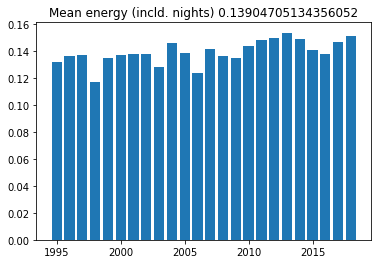

In [3]:
# Mean annual energy (incld. nights) for each year
mean_energy = []
print("YEAR","\t", "AVERAGE ENERGY","\t", "VARIANCE")
for key in annual_rec:
    print(key,"\t", np.mean(annual_rec[key]),"\t", np.var(annual_rec[key]))
    mean_energy.append(np.mean(annual_rec[key]))
plt.bar(range(1995,2019),height=mean_energy)
plt.title("Mean energy (incld. nights) " + str(np.mean(mean_energy)));

YEAR 	 AVERAGE ENERGY 	 VARIANCE
1995 	 0.20476901278631823 	 0.04541710486591167
1996 	 0.20518094688653815 	 0.04766977317417693
1997 	 0.21012911092945896 	 0.049431081465957656
1998 	 0.18250787479903 	 0.04021604308544933
1999 	 0.2077874015902508 	 0.04846090137553767
2000 	 0.21058397158082492 	 0.05101668534218897
2001 	 0.21135872454429935 	 0.050894302617153914
2002 	 0.2116744739395468 	 0.052986653474334074
2003 	 0.19834146830549965 	 0.047919106180233824
2004 	 0.22424480194699525 	 0.05654020205177553
2005 	 0.21323365121001644 	 0.049984951386362865
2006 	 0.19156601402134332 	 0.04539899481101916
2007 	 0.2173897090121431 	 0.05343073409194368
2008 	 0.2103683437036854 	 0.05102131047466562
2009 	 0.20860098539911925 	 0.05080862353388897
2010 	 0.22151372349369985 	 0.05591287578445097
2011 	 0.21865656658050317 	 0.054969741417331
2012 	 0.22362061158547988 	 0.057732961716094384
2013 	 0.23473778991960959 	 0.05970254030042082
2014 	 0.22882780565379487 	 0.05898000

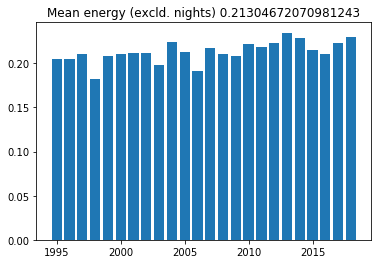

In [4]:
# Mean annual energy (excld. nights) for each year
mean_energy = []
print("YEAR","\t", "AVERAGE ENERGY","\t", "VARIANCE")
for key in annual_rec:
    non_zero_energy = np.array(annual_rec[key])
    non_zero_energy = non_zero_energy[non_zero_energy>0]
    print(key,"\t", np.mean(non_zero_energy),"\t", np.var(non_zero_energy))
    mean_energy.append(np.mean(non_zero_energy))
plt.bar(range(1995,2019),height=mean_energy)
plt.title("Mean energy (excld. nights) " + str(np.mean(mean_energy)));

In [5]:
all_trace = []
for key in annual_rec:
    for trace in annual_rec[key]:
        all_trace.append(trace)

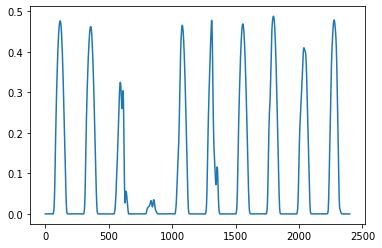

In [6]:
plt.plot(all_trace[:240*10])

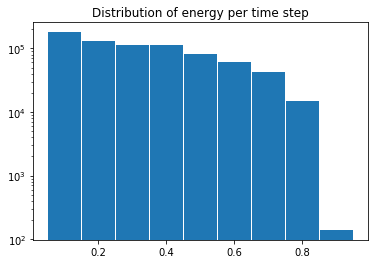

In [7]:
all_trace = np.array(all_trace)
all_trace = all_trace[all_trace>0]
hist = plt.hist(all_trace, rwidth=0.95,align='left', bins=np.linspace(0.1,1,10))
plt.yscale('log')
plt.title("Distribution of energy per time step");

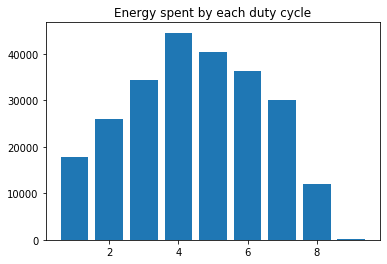

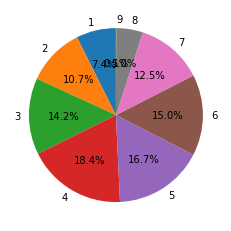

In [8]:
counts = hist[0]
vals = hist[1][:-1]
# Energies spent by each duty cycle
energies = np.multiply(counts,vals)

plt.bar((np.arange(9)+1),height=energies)
plt.title("Energy spent by each duty cycle")
plt.show()
plt.pie(energies, labels=np.arange(9)+1, autopct='%1.1f%%',startangle=90);
plt.show()